In [3]:
'''
k-Nearest Neighbors
'''
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)



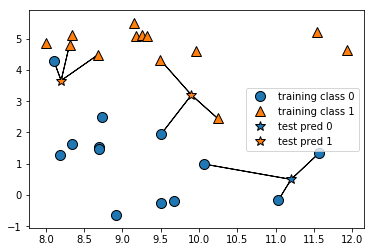

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))


Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


In [10]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

NameError: name 'train_test_split' is not defined

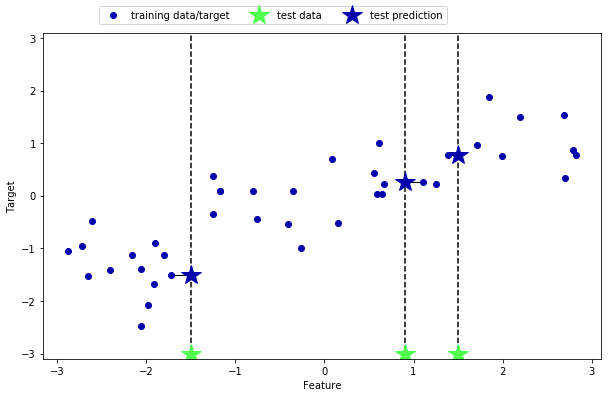

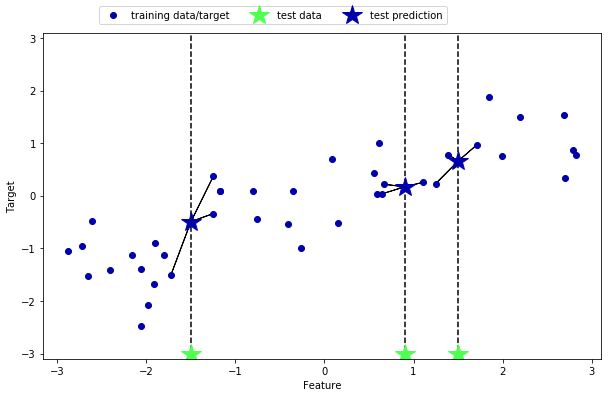

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=3)

w[0]: 0.393906  b: -0.031804


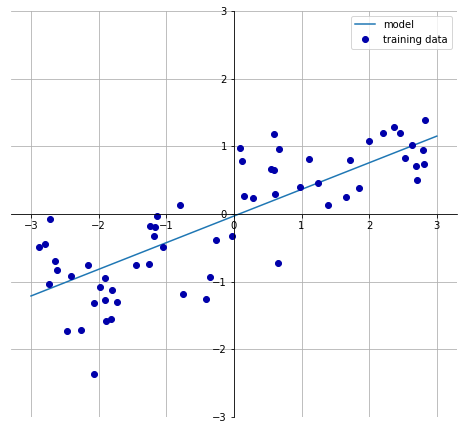

In [6]:
'''
Linear models
'''
mglearn.plots.plot_linear_regression_wave()

In [7]:
'''
Linear regression
It finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. 
The mean squared error is the sum of the squared differences between the predictions and the true values. 
'''
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Similar results, probably underfitting")

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66
Similar results, probably underfitting


In [8]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Discrepancy in the results, with the training score being with high accurancy, probably underfitting")

Training set score: 0.95
Test set score: 0.61
Discrepancy in the results, with the training score being with high accurancy, probably underfitting


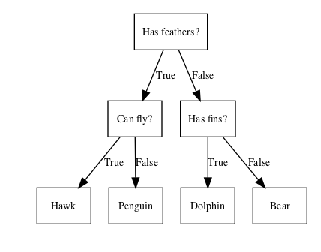

In [9]:
'''
Decision Trees
They are widely used models for classification and regression tasks: they learn a hierarchy of if/else questions, leading to a decision.
'''
mglearn.plots.plot_animal_tree()

In [10]:
'''
Building decision trees
Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
'''
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))



Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [11]:
'''
The accuracy on the training set is 100% because the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.
If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex and it can lead to overfitting. 
One option is to stop building the tree after a certain depth has been reached. 
Here we set max_depth=4, meaning only four consecutive questions can be asked.
This leads to a lower accuracy on the training set, but an improvement on the test set.
'''

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


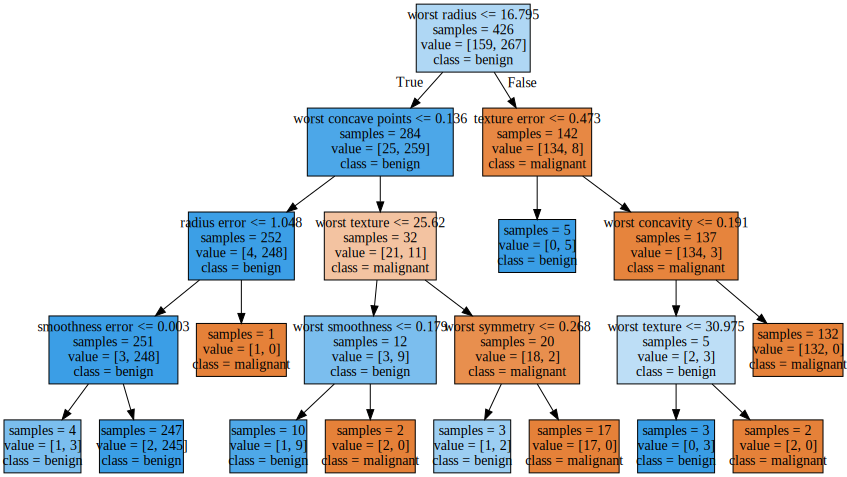

In [12]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
    feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot") as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)

Text(0,0.5,'Price in $/Mbyte')

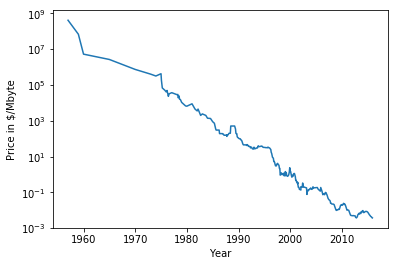

In [13]:
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000 
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target 
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

'''
The linear model approximates the data with a line providing quite a good forecast for the test data, while glossing over some of the finer variations in both the training and the test data. 
The tree model makes perfect predictions on the training data; we did not restrict the complexity of the tree, so it learned the whole dataset by heart. Once we leave the data range for which the model has data, the model simply keeps predicting the last known point. 
The tree has no ability to generate “new” responses, outside of what was seen in the training data. 
This shortcoming applies to all models based on trees.
'''

NameError: name 'ram_prices' is not defined

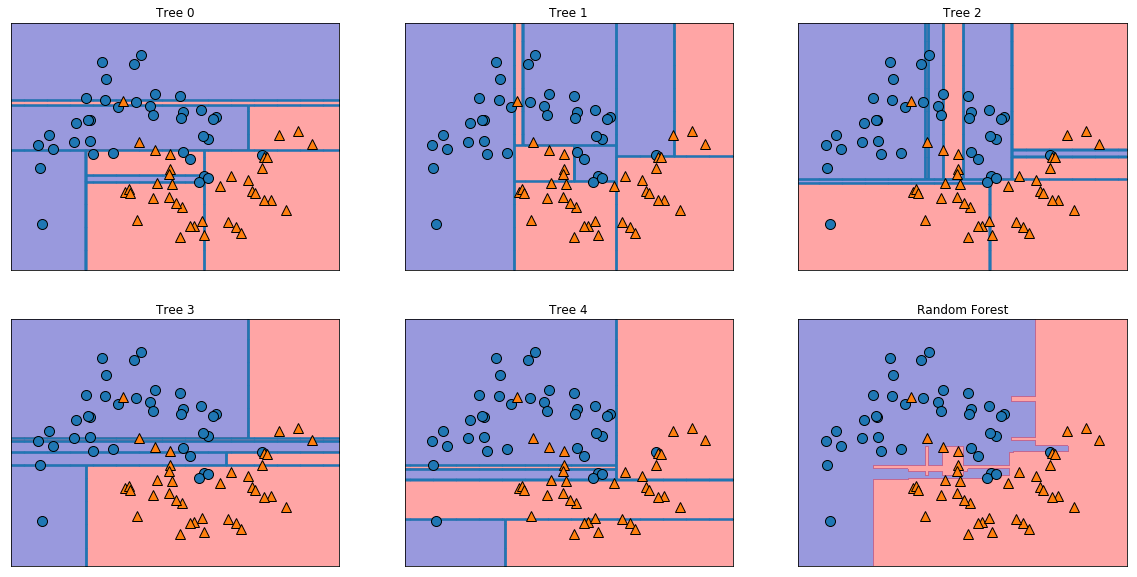

In [18]:
'''
Ensembles of Decision Trees
The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. 
The ensemble methods are usually used in place of a single decision tree.
Ensembles are methods that combine multiple machine learning models to create more powerful models. 
There are two ensemble models that have proven to be effective on a wide range of datasets for classification and regression, both of which use decision trees as their building blocks: random forests and gradient boosted decision trees.

Random forests
A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. 
The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. 
If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. 
'''

from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# random forest of five trees
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

'''
The trees that are built as part of the random forest are stored in the estimator_ attribute. 
Let’s visualize the decision boundaries learned by each tree and their aggregate prediction as made by the forest
'''
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
        ax.set_title("Tree {}".format(i))
        mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

'''
Each of the trees makes some mistakes, as some of the training points that are plotted here were not actually included in the training sets of the trees, due to the bootstrap sampling.
The random forest overfits less than any of the trees individually, and provides a much more intuitive decision boundary. 
In any real application, we would use many more trees (often hundreds or thousands), leading to even smoother boundaries.
'''



In [22]:
'''
random forest consisting of 100 trees on the Breast Cancer dataset
'''
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

'''
The random forest gives us an accuracy of 97%, better than the linear models or a single decision tree, without tuning any parameters.
'''
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [24]:
'''
Gradient boosted regression trees (gradient boosting machines)
The main idea behind gradient boosting is to combine many simple models like shallow trees. 
Each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance.
An important parameter of gradient boosting is the learning_rate, which controls how strongly each tree tries to correct the mistakes of the previous trees. 
Example of using GradientBoostingClassifier on the Breast Cancer dataset. By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used
'''
from sklearn.ensemble import GradientBoostingClassifier 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


Text(0,0.5,'Feature 1')

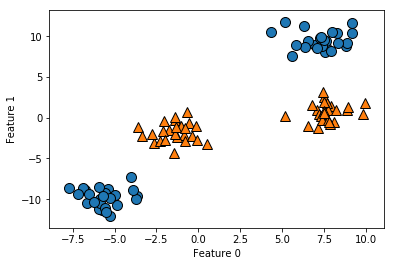

In [11]:
'''
Kernelized Support Vector Machines (SVM)
Support vector machines for classification (SVC). 
Support vector machines for regression (SVR).
'''
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8) 
y=y%2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



Text(0,0.5,'Feature 1')

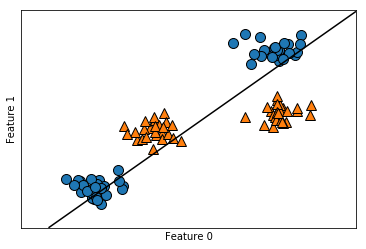

In [14]:
'''
A linear model for classification can only separate points using a line, and will not be able to do a very good job on this dataset
'''
from sklearn.svm import LinearSVC 
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5,0,'feature1 ** 2')

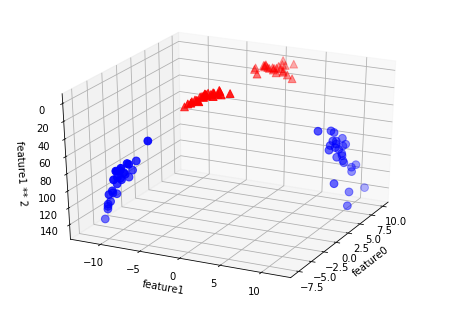

In [17]:
'''
Let’s expand the set of input features, say by also adding feature1 ** 2, the square of the second feature, as a new feature. 
Instead of representing each data point as a two-dimensional point, (feature0, feature1), we now represent it as a three-dimensional point, (feature0, feature1, feature1 ** 2).
In the new representation of the data, it is now possible to separate the two classes using a linear model, a plane in three dimensions. 
'''
#add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d 
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask=y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0.5,0,'feature0 ** 2')

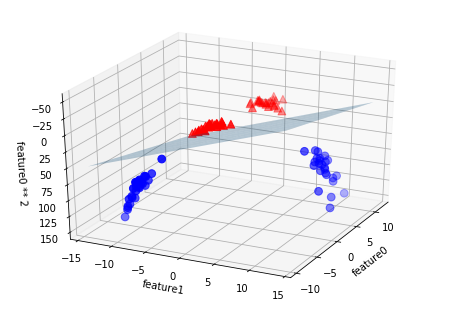

In [18]:
'''
We can confirm this by fitting a linear model to the augmented data
'''
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
    
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

Text(0,0.5,'Feature 1')

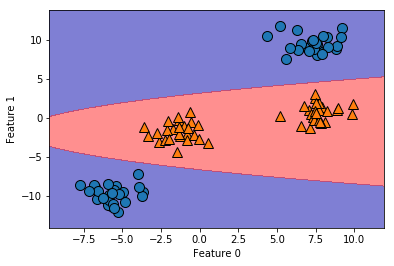

In [19]:
'''
As a function of the original features, the linear SVM model is not actually linear anymore but more of an ellipse.
'''
ZZ=YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]) 
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")